In [56]:

# Ignore  the warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#import missingno as msno

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
users = pd.read_csv('Data/takehome_users.csv', encoding = 'ISO-8859-1')
login = pd.read_csv('Data/takehome_user_engagement.csv', encoding = 'ISO-8859-1')

In [58]:
users.shape, login.shape

((12000, 10), (207917, 3))

In [59]:
users.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [60]:
login.head()


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


## Data Preprocessing

#### Merge Data

In [61]:
df = pd.merge(login, users, how='left', left_on='user_id', right_on='object_id')
df.head()

,time_stamp,user_id,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 13 columns):
time_stamp                    207917 non-null object
user_id                       207917 non-null int64
visited                       207917 non-null int64
object_id                     207917 non-null int64
creation_time                 207917 non-null object
name                          207917 non-null object
email                         207917 non-null object
creation_source               207917 non-null object
last_session_creation_time    207917 non-null float64
opted_in_to_mailing_list      207917 non-null int64
enabled_for_marketing_drip    207917 non-null int64
org_id                        207917 non-null int64
invited_by_user_id            116887 non-null float64
dtypes: float64(2), int64(6), object(5)
memory usage: 22.2+ MB


In [63]:
df.shape

(207917, 13)

10 + 3 = 13 , drop object_id ?
all rows good

#### Converting into datetime

In [64]:
df.time_stamp = pd.to_datetime(df.time_stamp)
df = df.set_index('time_stamp')

### Missing value imputation

In [65]:
print("--------------------------------------------User----------------------------------------------")
print(users.info())
print("--------------------------------------------Login-------------------------------------------------")
print(login.info())
print("--------------------------------------------Full------------------------------------------------")
print(df.info())

--------------------------------------------User----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB
None
--------------------------------------------Login-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
ti

user dataframe have missing value for **last_session_creation_time**, but the merged dataframe, data, doesnt. 

need to figure out why


In [66]:
unique_Creation_time = df.last_session_creation_time.unique()

In [67]:
for i in unique_Creation_time:
    if i not in users['last_session_creation_time'].values:
        print(i)

### all value exist meaning meaning reamaiing users i.e 12000  - 8823  never logged bag in
also we do net need to do any imputation in fianl data frame as all values are filled


In [68]:
8823/12000


0.73525

**73 percent did logeed back in**

**invited by user Impputation**

we will fill missing rows as it basically mean no one invited them and this can be important feay=ture so its not a good idea to drop a column

In [69]:
len(users)/len(df.invited_by_user_id.unique())

5.381165919282512

only 5.4 % users refered new users

-- feature idea = refreed by user not not true or false

## Drop Column
* Object id and user id hold same vale thus we will drop object column
* we will also drop name and email column as user id should represent user

In [70]:
df = df.drop(['object_id', 'name'], axis=1)
df = df.sort_index()

## Find Adopted user

* Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period 
###  steps to find user 
* find how many time user visited in 7 days
* Keep users with visit more than 2
* Drop duplicate user ID

In [71]:
User_visits = df.groupby('user_id')['visited'].rolling('7d').count()

In [72]:
User_visits = User_visits.reset_index()

In [73]:
User_visits = User_visits.loc[User_visits['visited']>=3]

In [74]:
Adopted_users = User_visits[['user_id']].drop_duplicates()
Adopted_users = Adopted_users.reset_index(drop=True)


In [75]:
print(Adopted_users.head())
print("Total adopted users:",len(Adopted_users))

   user_id
0        2
1       10
2       20
3       33
4       42
Total adopted users: 1602


### Initial feature Engineering
* Adding flag indicating user adopted user 
* flag to indicate user was refred by other user or not
* find email provider by replacing enail id with email provider

In [76]:

df['adopted_user'] = df['user_id'].apply(lambda x: x in Adopted_users.values)
users['adopted_user'] = users['object_id'].apply(lambda x: x in Adopted_users.values)
users['invited_by_user'] = users['invited_by_user_id'].apply(lambda x: 1 if x>0 else 0)

In [77]:
users['email'] = users['email'].apply(lambda x: x.split('@')[1].split('.')[0])
df['email'] = df['email'].apply(lambda x: x.split('@')[1].split('.')[0])

In [78]:
#users['days_since_signup'] = (users.last_session_creation_time - users.creation_time).apply(lambda x: x.days)
#users.days_since_signup.fillna(0, inplace=True)

users.last_session_creation_time1 = pd.to_datetime(users.last_session_creation_time, unit='s')
users.creation_time1 = pd.to_datetime(users.creation_time)
#users['days_since_signup'] = (users.last_session_creation_time1 - users.creation_time1).apply(lambda x: x.days)


In [79]:
df.head()

,user_id,visited,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
time_stamp,,,,,,,,,,,
2012-05-31 08:20:06,10012,1,2012-05-31 08:20:06,hotmail,ORG_INVITE,1.338452e+09,0,1,225,7104.0,False
2012-05-31 15:47:36,3428,1,2012-05-31 15:47:36,gmail,SIGNUP_GOOGLE_AUTH,1.352822e+09,1,0,166,NaN,False
2012-05-31 17:19:37,9899,1,2012-05-31 17:19:37,yahoo,ORG_INVITE,1.338485e+09,0,0,138,9899.0,False
2012-05-31 21:58:33,1693,1,2012-05-31 21:58:33,gmail,SIGNUP_GOOGLE_AUTH,1.399932e+09,0,1,50,NaN,True
2012-06-01 00:17:30,6102,1,2012-06-01 00:17:30,gustr,ORG_INVITE,1.339719e+09,0,0,34,6102.0,False


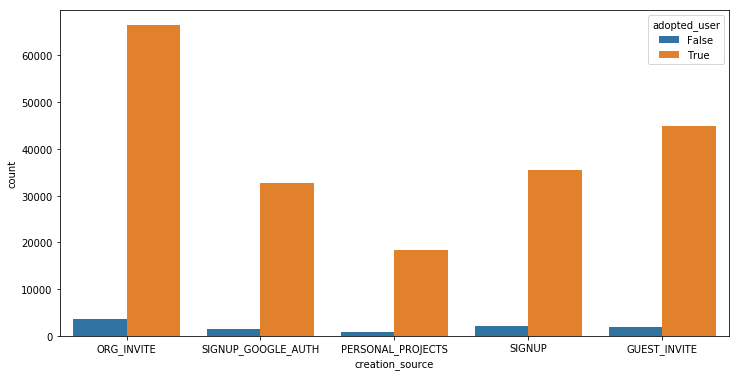

In [116]:
plt.figure(figsize=(12,6))
sns.countplot(x='creation_source', data=df, hue='adopted_user')

In [81]:
len(users.email.unique())

1184

In [82]:
main_domain = ['gmail', 'yahoo', 'jourrapide', 'cuvox', 'gustr', 'hotmail']
df.email[~df.email.isin(main_domain)] = 'others'

In [83]:
users.email[~users.email.isin(main_domain)] = 'others'

Text(0.5, 1.0, 'Adopted Status by Email Domain')

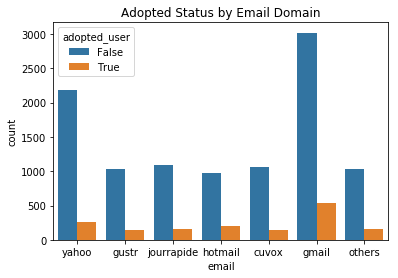

In [84]:
sns.countplot(x='email', hue='adopted_user', data=users)
plt.title('Adopted Status by Email Domain')

Text(0.5, 1.0, 'Adopted Status by Mailing List Opt-in')

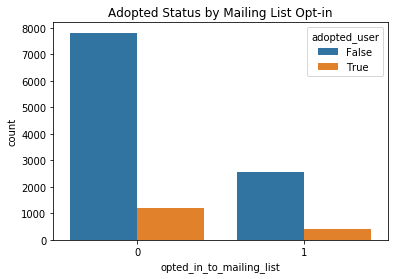

In [85]:
sns.countplot(x='opted_in_to_mailing_list', hue='adopted_user', data=users)
plt.title('Adopted Status by Mailing List Opt-in')

In [86]:
opted_in_to_mailing_list_df = users.pivot_table(index='adopted_user', columns='opted_in_to_mailing_list', values='object_id', aggfunc='count', fill_value=0)
opted_in_to_mailing_list_df.loc['Fraction_Positive'] = round(opted_in_to_mailing_list_df.loc[True]/opted_in_to_mailing_list_df.sum(), 2)
opted_in_to_mailing_list_df

opted_in_to_mailing_list,0,1
adopted_user,,
False,7818.00,2580.00
True,1188.00,414.00
Fraction_Positive,0.13,0.14


Text(0.5, 1.0, 'Adopted Status by Marketing Drip Status')

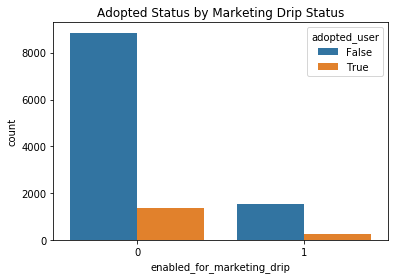

In [87]:
sns.countplot(x='enabled_for_marketing_drip', hue='adopted_user', data=users)
plt.title('Adopted Status by Marketing Drip Status')

Text(0.5, 1.0, 'Adopted Status by Organization')

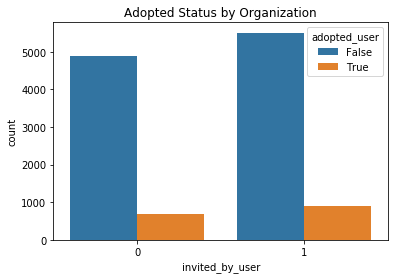

In [88]:
sns.countplot(x='invited_by_user', hue='adopted_user', data=users)
plt.title('Adopted Status by Organization')

In [89]:
#plt.title('Days since Signup Boxplot for Adopted status')
#sns.boxplot(y='days_since_signup', x='adopted_user', data=users)

## Modelling

Let us use a simple Random Forest Classification Algorithm and see which of the features are important and how reliably we can predict whether the user is adopted or not



Drop the columns which wouldnt influence adopted users - 'object_id', 'creation_time', 'name', 'email', 'invited_by_user_id' (since we have converted that to invited_by_user column)



In [90]:
users_df = users.drop(['object_id', 'creation_time', 'name', 'email', 'invited_by_user_id'], axis=1)


In [91]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  12000 non-null bool
invited_by_user               12000 non-null int64
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 1.0+ MB


Fill the missing last_session_creation_time with the median. The users with missing values are not adopted. We fill in these with the median.
Normalize last_session_creation_time
Convert strings to numeric categories
Convert adopted_user to {1, 0} depending on whether it is True or False

In [92]:

import math

#median = math.floor(users_df['last_session_creation_time'].astype('int64').median())

median = users_df['last_session_creation_time'].median()
mean = users_df['last_session_creation_time'].mean()

#mean = math.floor(users_df['last_session_creation_time'].astype('int64').mean())


creation_source_dict = {'GUEST_INVITE':0, 'ORG_INVITE':1, 'PERSONAL_PROJECTS':2, 'SIGNUP':3, 'SIGNUP_GOOGLE_AUTH':4}
adopted_user_dict = {'False': 0, 'True': 1}
min_max_scaler = preprocessing.MinMaxScaler()

users_df['last_session_creation_time'] = users_df['last_session_creation_time'].fillna(median)
users_df['last_session_creation_time'] = min_max_scaler.fit_transform(users_df['last_session_creation_time'].values.reshape(-1, 1))
users_df['creation_source'] = users_df['creation_source'].map(creation_source_dict)
users_df['adopted_user'] = users_df['adopted_user'].map({True:1, False:0})
users_df.head()

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,invited_by_user
0,0,0.938254,1,0,11,0,1
1,1,0.908366,0,0,1,1,1
2,1,0.397434,0,0,94,0,1
3,0,0.483504,0,0,1,0,1
4,0,0.320639,0,0,193,0,1


In [95]:
  
#users_df['days_since_signup'] = users_df['days_since_signup'].fillna(0)


In [96]:

X = users_df.drop('adopted_user', axis=1)
y = users_df['adopted_user']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#X2_train, X2_test = X_train.drop('last_session_creation_time', axis=1), X_test.drop('last_session_creation_time', axis=1)

In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9600 entries, 3094 to 4944
Data columns (total 6 columns):
creation_source               9600 non-null int64
last_session_creation_time    9600 non-null float64
opted_in_to_mailing_list      9600 non-null int64
enabled_for_marketing_drip    9600 non-null int64
org_id                        9600 non-null int64
invited_by_user               9600 non-null int64
dtypes: float64(1), int64(5)
memory usage: 525.0 KB


# Random Forest Classifier

In [98]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 500], 
             'max_depth': [5, 10, 20], 
             'max_features': [2, 3, 5],
             'min_samples_leaf': [1, 3, 7], 
             'min_samples_split': [2, 5, 10]}

rf_cv = RandomizedSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 20], 'max_features': [2, 3, 5], 'min_samples_leaf': [1, 3, 7], 'min_samples_split': [2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [99]:
rf_cv.best_params_


{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 2,
 'max_depth': 5}

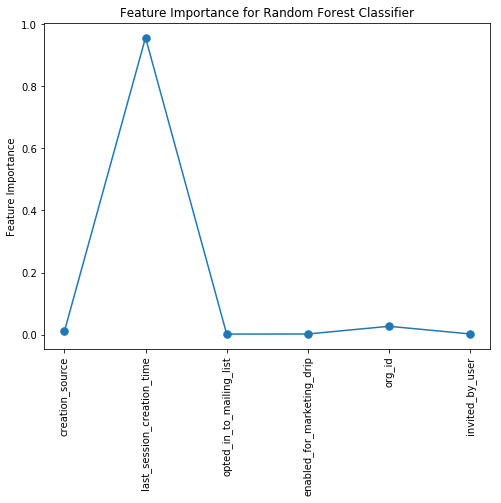

In [100]:

fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(rf_cv.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(rf_cv.best_estimator_.feature_importances_)), X_train.columns, rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Random Forest Classifier')
plt.show()

In [101]:
y_pred = rf_cv.predict(X_test)


In [104]:
confusion_matrix(y_test, y_pred)


array([[2005,   75],
       [ 111,  209]], dtype=int64)

In [105]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2080
           1       0.74      0.65      0.69       320

   micro avg       0.92      0.92      0.92      2400
   macro avg       0.84      0.81      0.82      2400
weighted avg       0.92      0.92      0.92      2400



# Logistic Regression Classifier

In [106]:
lr = LogisticRegression(class_weight='balanced')
param_grid = {'C':[0.001, 0.01, 0.1], 'tol':[1e-5, 1e-4, 0.001]}
lr_cv = RandomizedSearchCV(lr, param_grid, cv=5)
lr_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'C': [0.001, 0.01, 0.1], 'tol': [1e-05, 0.0001, 0.001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [107]:
lr_cv.best_params_


{'tol': 1e-05, 'C': 0.1}

In [108]:
lr_cv = LogisticRegression(C=0.1,tol=0.0001, class_weight='balanced')
lr_cv.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [109]:
features = pd.DataFrame(X_train.columns[:-1], columns=['features'])
coefficients = pd.DataFrame(abs(lr_cv.coef_)).unstack().unstack()
results = pd.concat([features, coefficients], axis=1)
results.columns = ['features', 'coefficients']
results.sort_values(by='coefficients', ascending=False)

,features,coefficients
1,last_session_creation_time,4.604315
5,NaN,0.322401
0,creation_source,0.055179
3,enabled_for_marketing_drip,0.045111
2,opted_in_to_mailing_list,0.010152
4,org_id,0.001102


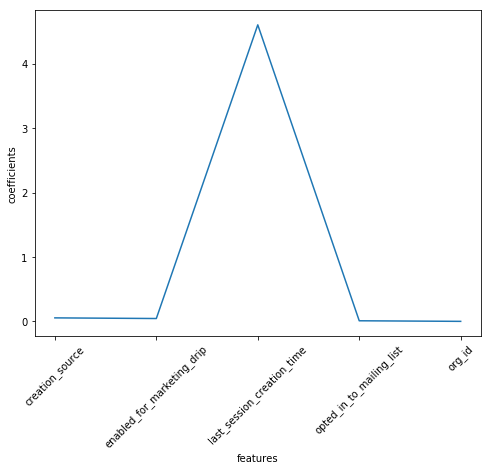

In [110]:
fig = plt.figure(figsize=(8, 6))
g=sns.lineplot(x="features", y="coefficients", data=results)
axes.set(ylabel='Feature Importance', title='Feature Importance for Random Forest Classifier')
#g.set_xticklabels(rotation=30)
plt.xticks(rotation=45)

plt.show()

In [111]:
y_pred = lr_cv.predict(X_test)


In [112]:
confusion_matrix(y_test, y_pred)


array([[1604,  476],
       [  53,  267]], dtype=int64)

In [113]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.77      0.86      2080
           1       0.36      0.83      0.50       320

   micro avg       0.78      0.78      0.78      2400
   macro avg       0.66      0.80      0.68      2400
weighted avg       0.89      0.78      0.81      2400



* Random forest have much better results